# EDA

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 

In [52]:
df = pd.read_csv('data/secondary_data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

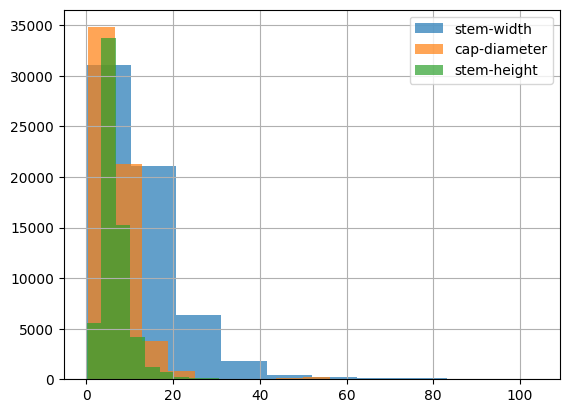

In [53]:
for col in ['stem-width', 'cap-diameter', 'stem-height']:
    
    df[col].hist(label=col, alpha=0.7)
plt.legend(loc="upper right")

In [54]:
df = pd.get_dummies(df)
df.head()

,cap-diameter,stem-height,stem-width,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


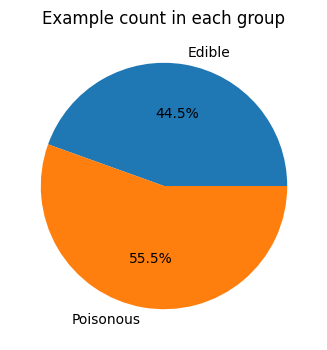

In [55]:
fig = plt.figure(figsize = (8, 4))

plt.pie(
    df.groupby('class_p')['class_p'].count(), 
    labels = ['Edible', 'Poisonous'],
    autopct='%.1f%%'
)

plt.title("Example count in each group")
plt.show()

# Tree

In [56]:
from tree import Tree
from splitter import Splitter
from entropy import entropy_estimator
import numpy as np

from evaluator import evaluator

Accuracy shows how often a classification ML model is correct overall.

Precision shows how often an ML model is correct when predicting the target class.

Recall shows whether an ML model can find all objects of the target class. 

In [57]:
def predict_label(row):
    
    return tree.predict_label(row)

def get_model_perfomance_metrics(df, target_col, predicted_col) -> None:
    accuracy = evaluator.estimate_accuracy(df[target_col], df[predicted_col])
    precision = evaluator.estimate_precision(df[target_col], df[predicted_col])
    recall = evaluator.estimate_recall(df[target_col], df[predicted_col])
    
    print (
        f"Accuracy: {accuracy:0.3f}\n"
        f"Precision: {precision:0.3f}\n"
        f"Recall: {recall:0.3f}\n"
    )

In [58]:
target_feature = 'class_p'

df[target_feature] = (df[target_feature]).astype('int')

df.head()

,cap-diameter,stem-height,stem-width,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,False,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,False,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,False,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,False,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,False,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [59]:
df = df.drop('class_e', axis=1)
features = df.columns.to_list()
features.remove(target_feature)

df_train, df_test = Splitter().train_test_split(df, 0.75)
print (len(df_train))

45802


In [60]:
%%time

for criterion in ['ENTROPY', "SCALED_IMPURITY", "GINI"]:
    print (f'--- {criterion} ---')
    df_train, df_test = Splitter().train_test_split(df, 0.75)
    
    tree = Tree(df_train, target_feature=target_feature, split_criterion=criterion, min_gain=0.0001, max_depth=3)
    node = tree.root
    tree.grow(node, df_train, features)
        
    df_train['label_pred'] = df_train.apply(func=predict_label, axis=1)
    get_model_perfomance_metrics(df_train, target_feature, 'label_pred')
    
    df_test['label_pred'] = df_test.apply(func=predict_label, axis=1)
    get_model_perfomance_metrics(df_test, target_feature, 'label_pred')

--- ENTROPY ---
Accuracy: 0.616
Precision: 0.781
Recall: 0.430

Accuracy: 0.623
Precision: 0.782
Recall: 0.436

--- SCALED_IMPURITY ---
Accuracy: 0.647
Precision: 0.784
Recall: 0.505

Accuracy: 0.651
Precision: 0.783
Recall: 0.507

--- GINI ---
Accuracy: 0.614
Precision: 0.785
Recall: 0.422

Accuracy: 0.619
Precision: 0.784
Recall: 0.426

CPU times: user 10min 6s, sys: 1min 17s, total: 11min 23s
Wall time: 12min 10s


## K-Fold CV 

In [20]:
import numpy as np
def generate_k_folds(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    indices = np.random.permutation(indices)
    folds = []
    for i in range(k):
        fold_indices = indices[i * fold_size: (i + 1) * fold_size]
        folds.append(fold_indices)
    return folds

# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = generate_k_folds(df, k)

In [24]:
fold_num = 1
train_scores = []
test_scores = []
predicted_col = 'label_pred'

for fold in fold_indices:
    
    n_examples = len(df.loc[fold])
    df_train, df_test = Splitter().train_test_split(df.loc[fold], 0.75)

    print (f'--- Fold {fold_num} ---')
    print (f'No of examples {n_examples}')

    tree = Tree(df_train, target_feature=target_feature, split_criterion="GINI", min_gain=0.001, max_depth=2)
    node = tree.root
    tree.grow(node, df_train, features)

    df_train[predicted_col] = df_train.apply(func=predict_label, axis=1)
    get_model_perfomance_metrics(df_train, target_feature, predicted_col)
    metric = evaluator.estimate_precision(df_train[target_feature], df_train[predicted_col])
    train_scores.append(metric)

    df_test[predicted_col] = df_test.apply(func=predict_label, axis=1)
    get_model_perfomance_metrics(df_test, target_feature, predicted_col)
    metric = evaluator.estimate_precision(df_test[target_feature], df_test[predicted_col])
    test_scores.append(metric)

    fold_num += 1
    print()

avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

std_train_score = np.std(train_scores)
std_test_score = np.std(test_scores)

print ('---')
print (f'Average recall (train): {avg_train_score:0.2f}')
print (f'Average recall (test): {avg_test_score:0.2f}')
print (f'Score std (train): {std_train_score:0.2f}')
print (f'Score std (test): {std_test_score:0.2f}')

--- Fold 1 ---
No of examples 12213
Accuracy: 0.609
Precision: 0.804
Recall: 0.397

Accuracy: 0.596
Precision: 0.781
Recall: 0.387


--- Fold 2 ---
No of examples 12213
Accuracy: 0.625
Precision: 0.770
Recall: 0.476

Accuracy: 0.626
Precision: 0.756
Recall: 0.481


--- Fold 3 ---
No of examples 12213
Accuracy: 0.608
Precision: 0.786
Recall: 0.409

Accuracy: 0.631
Precision: 0.782
Recall: 0.437


--- Fold 4 ---
No of examples 12213
Accuracy: 0.611
Precision: 0.796
Recall: 0.397

Accuracy: 0.607
Precision: 0.807
Recall: 0.403


--- Fold 5 ---
No of examples 12213
Accuracy: 0.613
Precision: 0.781
Recall: 0.410

Accuracy: 0.629
Precision: 0.787
Recall: 0.426


---
Average recall (train): 0.79
Average recall (test): 0.78
Score std (train): 0.01
Score std (test): 0.02


## Hyperparamter Tuning

In [119]:
import itertools

In [136]:
min_gain_options = np.arange(0.001, 0.05, 0.005)
print (len(min_gain_options))
min_gain_options = [round(x, 4) for x in min_gain_options]
max_depth_options = np.arange(1, 8, 2)

grid = list(itertools.product(min_gain_options, max_depth_options))

10


In [138]:
def run_kfold(df, fold_indices, min_gain, max_depth):
    def predict_label(row, tree):    
        return tree.predict_label(row)
    fold_num = 1
    train_scores = []
    test_scores = []
    predicted_col = 'label_pred'
    tree = None
    
    for fold in fold_indices:
        
        
        df_train, df_test = Splitter().train_test_split(df.loc[fold], 0.75)
        n_examples = len(df.loc[fold])
        n_examples_train = len(df_train)
    
        print (f'--- Fold {fold_num} ---')
        print (f'No of examples total {n_examples}')
        print (f'No of examples train {n_examples_train}')
        print (f'Min gain: {min_gain}')
        print (f'Max depth: {max_depth}')
    
        tree = Tree(
            df_train, 
            target_feature=target_feature, 
            split_criterion="GINI", 
            min_gain=min_gain, 
            max_depth=max_depth
        )
        node = tree.root
        tree.grow(node, df_train, features)
    
        df_train[predicted_col] = df_train.apply(func=predict_label, tree=tree, axis=1)
        get_model_perfomance_metrics(df_train, target_feature, predicted_col)
        metric = evaluator.estimate_precision(df_train[target_feature], df_train[predicted_col])
        train_scores.append(metric)
    
        df_test[predicted_col] = df_test.apply(func=predict_label, tree=tree, axis=1)
        get_model_perfomance_metrics(df_test, target_feature, predicted_col)
        metric = evaluator.estimate_precision(df_test[target_feature], df_test[predicted_col])
        test_scores.append(metric)
    
        fold_num += 1
        print()
    avg_train_score = np.mean(train_scores)
    avg_test_score = np.mean(test_scores)
    
    std_train_score = np.std(train_scores)
    std_test_score = np.std(test_scores)
    
    print ('----------------------------')
    print (f'Average recall (train): {avg_train_score:0.2f}')
    print (f'Average recall (test): {avg_test_score:0.2f}')
    print (f'Score std (train): {std_train_score:0.2f}')
    print (f'Score std (test): {std_test_score:0.2f}')

    return avg_test_score, std_test_score

In [139]:
df_grid = pd.DataFrame(columns=['min_gain', 'max_depth', 'precision_avg', 'precision_std_dev'])

In [140]:
for min_gain, max_depth in grid:
    precision_avg, precision_std = run_kfold(df, fold_indices, min_gain, max_depth)
    row = [min_gain, max_depth, precision_avg, precision_std]
    df_grid.loc[len(df_grid)] = row

--- Fold 1 ---
No of examples total 12213
No of examples train 9160
Min gain: 0.001
Max depth: 1
Accuracy: 0.588
Precision: 0.714
Recall: 0.436

Accuracy: 0.577
Precision: 0.701
Recall: 0.424


--- Fold 2 ---
No of examples total 12213
No of examples train 9160
Min gain: 0.001
Max depth: 1
Accuracy: 0.601
Precision: 0.695
Recall: 0.521

Accuracy: 0.594
Precision: 0.674
Recall: 0.521


--- Fold 3 ---
No of examples total 12213
No of examples train 9160
Min gain: 0.001
Max depth: 1
Accuracy: 0.591
Precision: 0.710
Recall: 0.453

Accuracy: 0.599
Precision: 0.685
Recall: 0.476


--- Fold 4 ---
No of examples total 12213
No of examples train 9160
Min gain: 0.001
Max depth: 1
Accuracy: 0.589
Precision: 0.704
Recall: 0.439

Accuracy: 0.579
Precision: 0.708
Recall: 0.439


--- Fold 5 ---
No of examples total 12213
No of examples train 9160
Min gain: 0.001
Max depth: 1
Accuracy: 0.593
Precision: 0.701
Recall: 0.453

Accuracy: 0.604
Precision: 0.698
Recall: 0.466


----------------------------
A

## Optimised hyperparameters

In [61]:
def generate_k_folds(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    indices = np.random.permutation(indices)
    folds = []
    for i in range(k):
        fold_indices = indices[i * fold_size: (i + 1) * fold_size]
        folds.append(fold_indices)
    return folds

# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = generate_k_folds(df, k)

In [62]:
fold_num = 1
train_scores = []
test_scores = []
predicted_col = 'label_pred'

for fold in fold_indices:
    
    n_examples = len(df.loc[fold])
    df_train, df_test = Splitter().train_test_split(df.loc[fold], 0.75)

    print (f'--- Fold {fold_num} ---')
    print (f'No of examples {n_examples}')

    tree = Tree(
        df_train, 
        target_feature=target_feature, 
        split_criterion="GINI", 
        min_gain=0.015, 
        max_depth=7
    )
    node = tree.root
    tree.grow(node, df_train, features)

    df_train[predicted_col] = df_train.apply(func=predict_label, axis=1)
    get_model_perfomance_metrics(df_train, target_feature, predicted_col)
    metric = evaluator.estimate_precision(df_train[target_feature], df_train[predicted_col])
    train_scores.append(metric)

    df_test[predicted_col] = df_test.apply(func=predict_label, axis=1)
    get_model_perfomance_metrics(df_test, target_feature, predicted_col)
    metric = evaluator.estimate_precision(df_test[target_feature], df_test[predicted_col])
    test_scores.append(metric)

    fold_num += 1
    print()

avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)

std_train_score = np.std(train_scores)
std_test_score = np.std(test_scores)

print ('---')
print (f'Average recall (train): {avg_train_score:0.2f}')
print (f'Average recall (test): {avg_test_score:0.2f}')
print (f'Score std (train): {std_train_score:0.2f}')
print (f'Score std (test): {std_test_score:0.2f}')

--- Fold 1 ---
No of examples 12213
Accuracy: 0.613
Precision: 0.817
Recall: 0.395

Accuracy: 0.601
Precision: 0.793
Recall: 0.387


--- Fold 2 ---
No of examples 12213
Accuracy: 0.627
Precision: 0.788
Recall: 0.460

Accuracy: 0.629
Precision: 0.776
Recall: 0.467


--- Fold 3 ---
No of examples 12213
Accuracy: 0.617
Precision: 0.820
Recall: 0.402

Accuracy: 0.640
Precision: 0.818
Recall: 0.427


--- Fold 4 ---
No of examples 12213
Accuracy: 0.615
Precision: 0.826
Recall: 0.383

Accuracy: 0.605
Precision: 0.828
Recall: 0.383


--- Fold 5 ---
No of examples 12213
Accuracy: 0.613
Precision: 0.781
Recall: 0.410

Accuracy: 0.629
Precision: 0.787
Recall: 0.426


---
Average recall (train): 0.81
Average recall (test): 0.80
Score std (train): 0.02
Score std (test): 0.02
